<a href="https://colab.research.google.com/github/Sujan-Sawant/Business-Case-Studies/blob/main/Delhivery_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = "Orange">Business Case: Delhivery - Feature Engineering

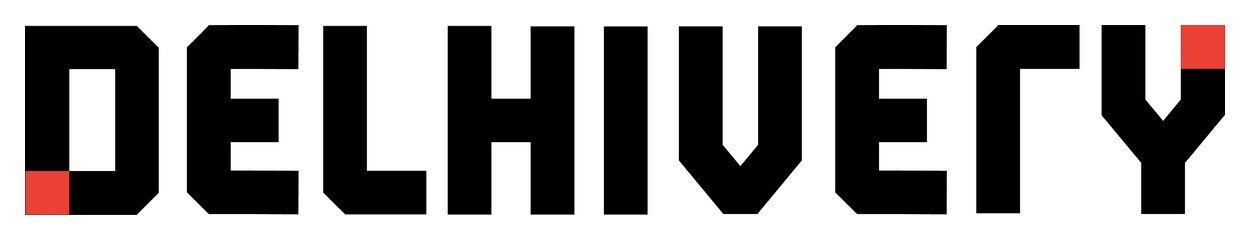

## <font color = Green>**Context** </font>
**Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021.**

**They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.**

**The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.**


## <font color = Red>**Business Problem**</font>
**The company wants to understand and process the data coming out of data engineering pipelines:**
 - **Clean, sanitize and manipulate data to get useful features out of raw fields**
 - **Make sense out of the raw data and help the data science team to build forecasting models on it**


## <font color = Green>**Column Profiling:**</font>

- **data**:	tells whether the data is testing or training data
- **trip_creation_time**:	 Timestamp of trip creation
- **route_schedule_uuid**:	Unique Id for a particular route schedule
- **route_type**:	Transportation type
 - FTL : Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
 - Carting: Handling system consisting of small vehicles (carts)
- **trip_uuid**:	Unique ID given to a particular trip (A trip may include different source and destination centers)
- **source_center**:	Source ID of trip origin
- **source_name**:	Source Name of trip origin
- **destination_cente**:	Destination ID
- **destination_name**:	Destination Name
- **od_start_time**:	Trip start time
- **od_end_time**:	Trip end time
- **start_scan_to_end_scan**:	Time taken to deliver from source to destination
- **is_cutoff**: Unknown field
- **cutoff_factor**: Unknown field
- **cutoff_timestamp**: Unknown field
- **actual_distance_to_destination**: Distance in Kms between source and destination warehouse
- **actual_time**: Actual time taken to complete the delivery (Cumulative)
- **osrm_time**: An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- **osrm_distance**: An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- **factor**: Unknown field
- **segment_actual_time**: This is a segment time. Time taken by the subset of the package delivery
- **segment_osrm_time**: This is the OSRM segment time. Time taken by the subset of the package delivery
- **segment_osrm_distance**: This is the OSRM distance. Distance covered by subset of the package delivery
- **segment_factor**: Unknown field




## <font color = Green>**Solution Approach**</font>

- **Concept Used:**
 - Feature Creation
 - Relationship between Features
 - Column Normalization /Column Standardization
 - Handling categorical values
 - Missing values - Outlier treatment / Types of outliers
 - Handled the outliers using the IQR method.


- **Conducted Basic data cleaning and exploration:**
 - **Handled missing values in the data.**
 - **Analyze the structure of the data.**
 - **Built some features to prepare the data for actual analysis.**
- **Extracted features from the below fields:**
 - **Destination Name:** Extract features out of destination. City-place-code (State)
 - **Source Name:** Extracted features out of destination. City-place-code (State)
 - **Trip_creation_time:** Extracted features like month, year and day etc.
- **In-depth analysis and feature engineering:**
 - **Calculated the time taken between od_start_time and od_end_time and keep it as a feature.**
 - **Compared the difference between Point a. and start_scan_to_end_scan.Did hypothesis testing/ Visual analysis to check.**
 - **Did hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value.**
 - **Did hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value.**
 - **Did hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value**
 - **Did hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value.**
- **Provided actionable insights and recommendations based on findings.**





In [ ]:
# Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloding the data
!gdown 1JUdV-RcrF_Z56VHbhHkf6V7vjVsf-5Ka

Downloading...
From: https://drive.google.com/uc?id=1JUdV-RcrF_Z56VHbhHkf6V7vjVsf-5Ka
To: /content/delhivery_data.txt
100% 55.6M/55.6M [00:00<00:00, 120MB/s]


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/delhivery_data.txt")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


## Exploratory Data Analysis and Data Cleaning (EDA)

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).

df.shape

(144867, 24)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .

df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.

df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
# Display the data type of each column in a DataFrame

df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame

df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
# Retrieving summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Convert to datetime and in corredted format
df["trip_creation_time_formatted"] = pd.to_datetime(df["trip_creation_time"]).dt.strftime("%d-%m-%Y %H:%M:%S")
df["od_start_time_formatted"] = pd.to_datetime(df["od_start_time"]).dt.strftime("%d-%m-%Y %H:%M:%S")
df["od_end_time_formatted"] = pd.to_datetime(df["od_end_time"]).dt.strftime("%d-%m-%Y %H:%M:%S")

df["trip_creation_time_formatted"] = pd.to_datetime(df["trip_creation_time_formatted"])
df["od_start_time_formatted"] = pd.to_datetime(df["od_start_time_formatted"])
df["od_end_time_formatted"] = pd.to_datetime(df["od_end_time_formatted"])

<ipython-input-187-794e117cdb44>:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["trip_creation_time_formatted"] = pd.to_datetime(df["trip_creation_time_formatted"])
<ipython-input-187-794e117cdb44>:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["od_start_time_formatted"] = pd.to_datetime(df["od_start_time_formatted"])
<ipython-input-187-794e117cdb44>:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["od_end_time_formatted"] = pd.to_datetime(df["od_end_time_formatted"])


In [ ]:
# Drop Duplicated or unnecessary columns
df.drop(columns=["trip_creation_time","od_start_time","od_end_time"],axis=1,inplace = True)

In [ ]:
df.head()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,is_cutoff,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_time_formatted,od_start_time_formatted,od_end_time_formatted
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,False,...,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   route_schedule_uuid             144867 non-null  object        
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   start_scan_to_end_scan          144867 non-null  float64       
 9   is_cutoff                       144867 non-null  bool          
 10  cutoff_factor                   144867 non-null  int64  

In [ ]:
df.columns

Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'is_cutoff',
       'cutoff_factor', 'cutoff_timestamp', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor', 'trip_creation_time_formatted',
       'od_start_time_formatted', 'od_end_time_formatted'],
      dtype='object')

In [ ]:
df.drop(columns=["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"],axis=1,inplace=True)

In [ ]:
# Check for missing values
(df.isnull().sum()/df.shape[0]) * 100

,0
data,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
start_scan_to_end_scan,0.000000
actual_distance_to_destination,0.000000


In [ ]:
df.shape

(144867, 19)

### The columns "source_name" and "destination_name" contain missing data.
###  We have two options for addressing this issue:
- ###  1. Drop the rows with missing values.
- ###  2. Fill in the missing values.

###  Given that there is very little missing data (not even 1 %), we will choose to drop these rows.

In [ ]:
df.dropna(subset=["source_name", "destination_name"], axis=0, inplace=True)

In [ ]:
(df.isnull().sum()/df.shape[0]) * 100

,0
data,0.0
route_schedule_uuid,0.0
route_type,0.0
trip_uuid,0.0
source_center,0.0
source_name,0.0
destination_center,0.0
destination_name,0.0
start_scan_to_end_scan,0.0
actual_distance_to_destination,0.0


In [ ]:
# # Analyze structure of data
print("Shape of the DataFrame:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nDataFrame Info:")
print(df.info())

Shape of the DataFrame: (144316, 19)

Data Types:
data                                      object
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
trip_creation_time_formatted      datetime64[ns]
od_start_time_formatted           datetime64[ns]
od_end_time_formatted             datetime64[ns]
dtype: object

Summ

# Build some features to prepare the data for actual analysis.

In [ ]:
df["destination_name"]

,destination_name
0,Khambhat_MotvdDPP_D (Gujarat)
1,Khambhat_MotvdDPP_D (Gujarat)
2,Khambhat_MotvdDPP_D (Gujarat)
3,Khambhat_MotvdDPP_D (Gujarat)
4,Khambhat_MotvdDPP_D (Gujarat)
...,...
144862,Gurgaon_Bilaspur_HB (Haryana)
144863,Gurgaon_Bilaspur_HB (Haryana)
144864,Gurgaon_Bilaspur_HB (Haryana)
144865,Gurgaon_Bilaspur_HB (Haryana)


# Creating new feature out of existing columns

In [ ]:
# Source city and source state
df["source_city"] = df["source_name"].str.split("_").str[:-1].str.join("_")
df["source_state"] = df["source_name"].str.extract(r"\((.*?)\)")

In [ ]:
# Destination city and destination state
df["destination_city"]= df["destination_name"].str.split("_").str[:-1].str.join("_")
df["destination_state"] = df["destination_name"].str.extract(r"\((.*?)\)")[0]

In [ ]:
# Trip Creation Day,Trip Creation Month,Trip Creation Year
df["trip_creation_day"]=df["trip_creation_time_formatted"].dt.day
df["trip_creation_month"]=df["trip_creation_time_formatted"].dt.month
df["trip_creation_year"]=df["trip_creation_time_formatted"].dt.year

In [ ]:
df.head()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,trip_creation_time_formatted,od_start_time_formatted,od_end_time_formatted,source_city,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,...,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,...,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,...,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,...,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,...,2018-09-20 02:35:36,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018


# In-depth analysis and feature engineering:

#### Calculate the time taken between od_start_time and od_end_time and keep it as a feature

In [ ]:
df["trip_completion_time"] = df["od_end_time_formatted"] - df["od_start_time_formatted"]

In [ ]:
df.head()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,od_start_time_formatted,od_end_time_formatted,source_city,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13


In [ ]:
df.tail()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,od_start_time_formatted,od_end_time_formatted,source_city,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time
144862,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,45.258278,...,2018-09-20 16:24:28,2018-09-20 23:32:09,Sonipat_Kundli,Haryana,Gurgaon_Bilaspur,Haryana,20,9,2018,0 days 07:07:41
144863,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,54.092531,...,2018-09-20 16:24:28,2018-09-20 23:32:09,Sonipat_Kundli,Haryana,Gurgaon_Bilaspur,Haryana,20,9,2018,0 days 07:07:41
144864,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,66.163591,...,2018-09-20 16:24:28,2018-09-20 23:32:09,Sonipat_Kundli,Haryana,Gurgaon_Bilaspur,Haryana,20,9,2018,0 days 07:07:41
144865,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,73.680667,...,2018-09-20 16:24:28,2018-09-20 23:32:09,Sonipat_Kundli,Haryana,Gurgaon_Bilaspur,Haryana,20,9,2018,0 days 07:07:41
144866,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,70.039010,...,2018-09-20 16:24:28,2018-09-20 23:32:09,Sonipat_Kundli,Haryana,Gurgaon_Bilaspur,Haryana,20,9,2018,0 days 07:07:41


In [ ]:
df.head()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,od_start_time_formatted,od_end_time_formatted,source_city,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,...,2018-09-20 03:21:32,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13


In [ ]:
 df["time_taken_seconds"] = df["trip_completion_time"].dt.total_seconds()

In [ ]:
df.head()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,od_end_time_formatted,source_city,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time,time_taken_seconds
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,...,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,...,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,...,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,...,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,...,2018-09-20 04:47:45,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0


In [ ]:
df["time_taken_hours"] = df["time_taken_seconds"] / 3600

In [ ]:
df["time_taken_minutes"] = df["time_taken_seconds"] / 60

In [ ]:
df.head()

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time,time_taken_seconds,time_taken_hours,time_taken_minutes
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,...,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,...,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,...,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,...,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,...,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667


## <font color ="Red">Outliers Treatment

## Visual Analysis for Outliers

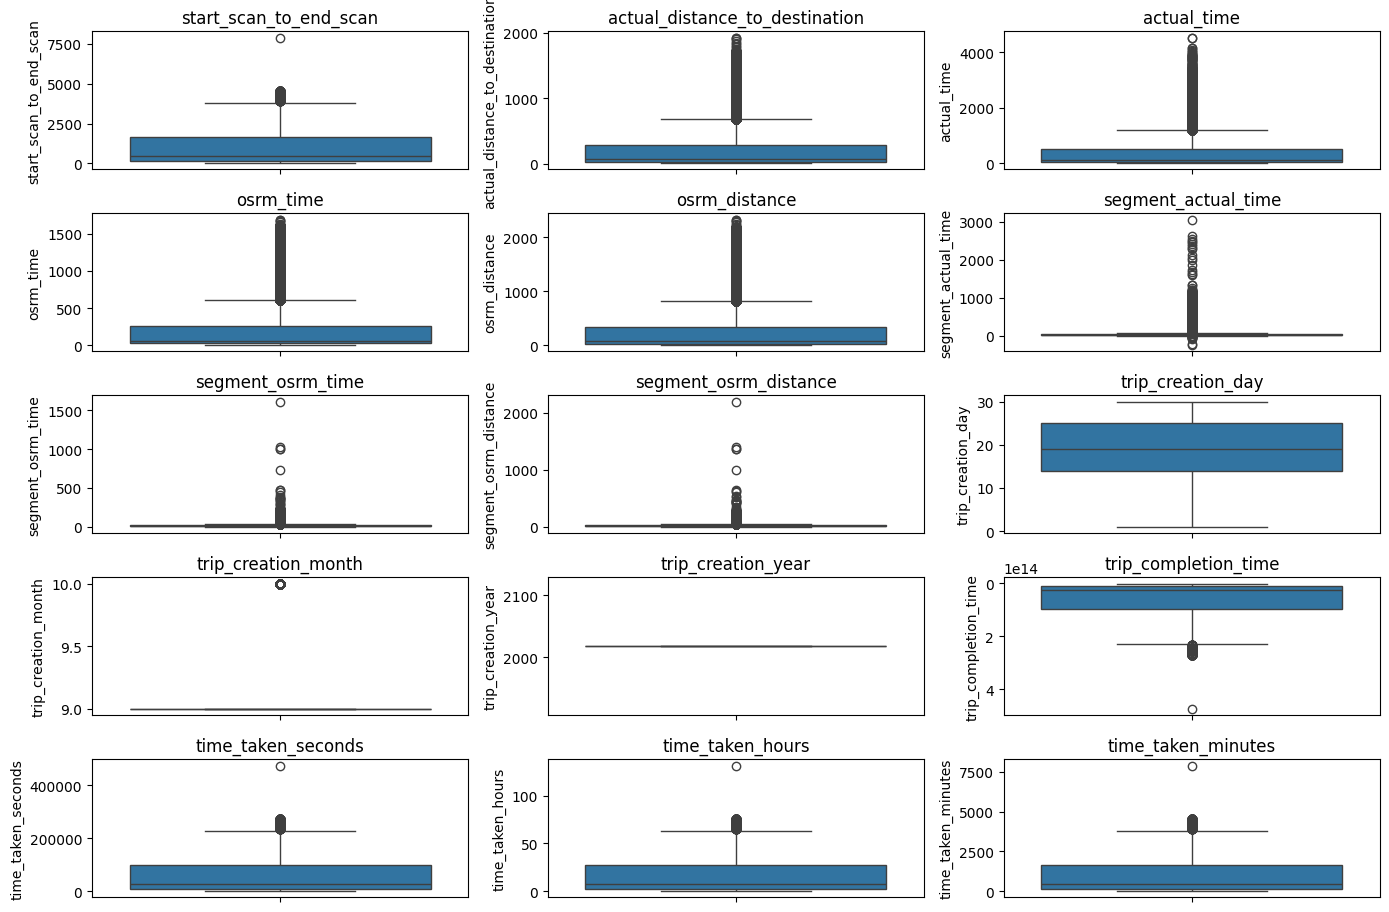

In [ ]:
numeric_columns = df.select_dtypes(include=["number"])

plt.figure(figsize=(14,11))
for i,col in enumerate (numeric_columns.columns):
  plt.subplot(6,3,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

## <Font color = "Yellow">Checking Count of outliers present in Dataset using **IQR: Inter Quartile Range** and remove them.

In [ ]:
import pandas as pd

# Select only numerical columns
numeric_columns = df.select_dtypes(include=["number"])

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Print the count of outliers for each numerical column
for col, count in outlier_counts.items():
    print(f"Count of outliers present in {col}: {count}")


Count of outliers present in start_scan_to_end_scan: 373
Count of outliers present in actual_distance_to_destination: 17818
Count of outliers present in actual_time: 16507
Count of outliers present in osrm_time: 17406
Count of outliers present in osrm_distance: 17547
Count of outliers present in segment_actual_time: 9262
Count of outliers present in segment_osrm_time: 6348
Count of outliers present in segment_osrm_distance: 4295
Count of outliers present in trip_creation_day: 0
Count of outliers present in trip_creation_month: 17384
Count of outliers present in trip_creation_year: 0
Count of outliers present in trip_completion_time: 373
Count of outliers present in time_taken_seconds: 373
Count of outliers present in time_taken_hours: 373
Count of outliers present in time_taken_minutes: 373


In [ ]:
# Create a DataFrame to store boolean flags for outliers
outlier_flags = pd.DataFrame(False, index=df.index, columns=numeric_columns.columns)

# Identify outliers for each numerical column
for col in numeric_columns.columns:
    outlier_flags[col] = identify_outliers(numeric_columns[col])

# Get the rows that are not outliers
df = df[~outlier_flags.any(axis=1)]



In [ ]:
df.shape

(100189, 30)

#### Lets Convert Categorical (route_type) column into numeric column using one hot encoding

In [ ]:
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df[["route_type"]])

# Step 1: Create a DataFrame from the one-hot encoded array
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["route_type"]))

# Step 2: Drop the original 'route_type' column and concatenate
df = pd.concat([df.drop("route_type", axis=1).reset_index(drop=True), one_hot_encoded_df], axis=1)

df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,data,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time,time_taken_seconds,time_taken_hours,time_taken_minutes,route_type_Carting,route_type_FTL
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,14.0,...,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667,1.0,0.0
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,24.0,...,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667,1.0,0.0
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,40.0,...,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667,1.0,0.0
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,62.0,...,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667,1.0,0.0
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,68.0,...,Gujarat,20,9,2018,0 days 01:26:13,5173.0,1.436944,86.216667,1.0,0.0


#### Lets normalize numerica columns using MinMaxScaler

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Select numeric columns
# numerical_cols = df.select_dtypes(include=["number"]).columns

# # Create the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the numeric columns
# scaled_data = scaler.fit_transform(df[numerical_cols])

# # Convert the scaled data back to a DataFrame with the original numeric column names
# scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# # Replace the original numeric columns in the original DataFrame
# df[numerical_cols] = scaled_df

# # Display the modified DataFrame
# df.head()


DTypePromotionError: The DType <class 'numpy.dtypes.Float64DType'> could not be promoted by <class 'numpy.dtypes.TimeDelta64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

# Compare the difference between time taken minutes and start_scan_to_end_scan. Do hypothesis testing

In [ ]:
# Since both Numerical VS Numerical data we will perform Pearsons Correlation test

# Stting Hypothesis
# Null Hypothesis (H0): There is no correlation.
# Alternative Hypothesis (H1): There is a correlation.

# Perform test

from scipy.stats import pearsonr
r, p_value = pearsonr(df["start_scan_to_end_scan"], df["time_taken_minutes"])

# Output results
print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

# Conclusion result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation/n.")

print("Since Pearson correlation coefficient: 0.9999999609566641 is almost 1 there is no diffrence between these two\n")

Pearson correlation coefficient: 0.9999999371928908
P-value: 0.0
Reject the null hypothesis: There is a significant correlation.
Since Pearson correlation coefficient: 0.9999999609566641 is almost 1 there is no diffrence between these two



In [ ]:
df.drop(columns=["time_taken_hours","time_taken_seconds","time_taken_minutes"],axis=1,inplace = True)

In [ ]:
df.head()

,data,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_city,source_state,destination_city,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_completion_time,route_type_Carting,route_type_FTL
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,14.0,...,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,1.0,0.0
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,24.0,...,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,1.0,0.0
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,40.0,...,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,1.0,0.0
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,62.0,...,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,1.0,0.0
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,68.0,...,Anand_VUNagar,Gujarat,Khambhat_MotvdDPP,Gujarat,20,9,2018,0 days 01:26:13,1.0,0.0


#### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid0029

### Before conducting hypothesis test lets check outliers and treat them.

In [ ]:
aggregated_df = df.groupby("trip_uuid").agg({
    "actual_time": "mean",
    "osrm_time": "mean"
}).reset_index()

print(aggregated_df)

                     trip_uuid  actual_time   osrm_time
0      trip-153671041653548748   429.193548  209.580645
1      trip-153671042288605164    44.333333   23.333333
2      trip-153671043369099517   436.555556  264.611111
3      trip-153671046011330457    41.000000   12.000000
4      trip-153671052974046625    70.833333   27.166667
...                        ...          ...         ...
12810  trip-153835182757593609    26.500000    9.000000
12811  trip-153835182991141457    46.750000   37.500000
12812  trip-153835187062195567    44.000000   11.000000
12813  trip-153835190097172173    46.111111   25.888889
12814  trip-153835198515486693    47.625000   17.875000

[12815 rows x 3 columns]


Text(0.5, 1.0, 'Box Plot of OSRM Time')

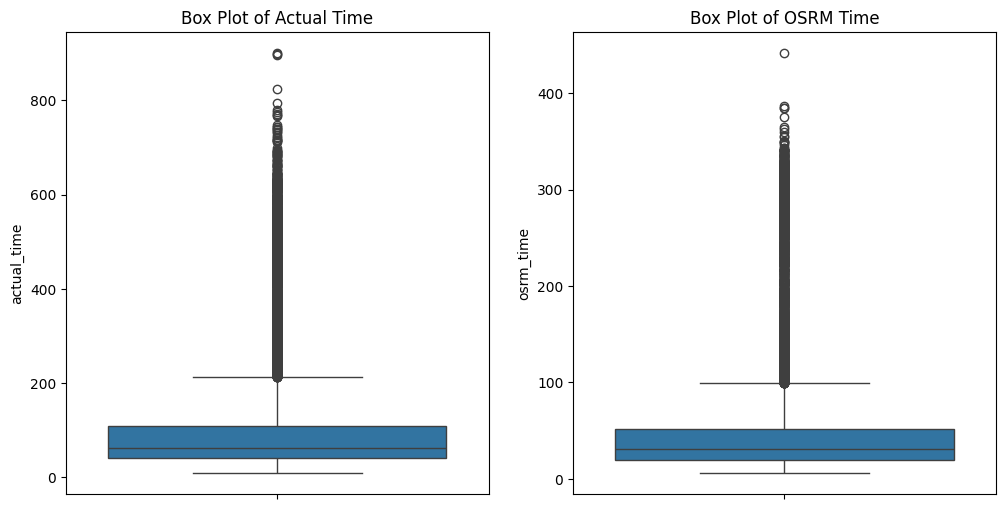

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Box plot for actual_time
plt.subplot(1, 2, 1)
sns.boxplot(y=aggregated_df["actual_time"])
plt.title("Box Plot of Actual Time")

# Box plot for osrm_time
plt.subplot(1, 2, 2)
sns.boxplot(y=aggregated_df["osrm_time"])
plt.title("Box Plot of OSRM Time")

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

actual_time_outliers = identify_outliers(aggregated_df["actual_time"])
osrm_time_outliers = identify_outliers(aggregated_df["osrm_time"])

print("Actual Time Outliers:")
print(actual_time_outliers)

print("\nOSRM Time Outliers:")
print(osrm_time_outliers)

print("\n Count of outliers present in actual and OSRM time ")
print (len(actual_time_outliers),len(osrm_time_outliers))





Actual Time Outliers:
0        429.193548
2        436.555556
13       236.666667
14       219.333333
20       213.125000
            ...    
12678    673.000000
12695    340.958333
12715    373.200000
12730    227.875000
12748    215.476190
Name: actual_time, Length: 1573, dtype: float64

OSRM Time Outliers:
0        209.580645
2        264.611111
13       129.809524
39       122.318182
41       287.700000
            ...    
12734    109.909091
12743    102.571429
12748    148.095238
12756    128.500000
12802    105.000000
Name: osrm_time, Length: 1590, dtype: float64

 Count of outliers present in actual and OSRM time 
1573 1590


Out of 14,787 entries in the "Actual" and "OSRM" time columns, 1,768 and 1,803 were identified as outliers, respectively. Now, let's apply a treatment for these outliers.

In [ ]:
aggregated_df_cleaned = aggregated_df[~aggregated_df["actual_time"].isin(actual_time_outliers)]
aggregated_df_cleaned = aggregated_df_cleaned[~aggregated_df_cleaned["osrm_time"].isin(osrm_time_outliers)]
aggregated_df_cleaned


,trip_uuid,actual_time,osrm_time
1,trip-153671042288605164,44.333333,23.333333
3,trip-153671046011330457,41.000000,12.000000
4,trip-153671052974046625,70.833333,27.166667
5,trip-153671055416136166,30.666667,10.000000
6,trip-153671066201138152,24.000000,13.000000
...,...,...,...
12810,trip-153835182757593609,26.500000,9.000000
12811,trip-153835182991141457,46.750000,37.500000
12812,trip-153835187062195567,44.000000,11.000000
12813,trip-153835190097172173,46.111111,25.888889


## perform a paired t-test to determine if there's a significant difference between the means of actual_time and osrm_time.





In [ ]:
from scipy.stats import ttest_rel
# Extract values from cleaned DataFrame
actual_time_cleaned = aggregated_df_cleaned["actual_time"]
osrm_time_cleaned = aggregated_df_cleaned["osrm_time"]

# Perform paired t-test
t_statistic_cleaned, p_value_cleaned = ttest_rel(actual_time_cleaned, osrm_time_cleaned)

print(f"T-statistic (cleaned): {t_statistic_cleaned}\nP-value (cleaned): {p_value_cleaned}")

# Conclusion
if p_value_cleaned < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-statistic (cleaned): 138.99641051848238
P-value (cleaned): 0.0
Reject the null hypothesis: There is a significant difference.


Here p value is zero as T statistic is also vary high suggesting that there is huge diffrence between Actual and OSRM time (Also Statistical values below showing the large diffrence in both).

In [ ]:
print(aggregated_df_cleaned[['actual_time', 'osrm_time']].describe())


        actual_time     osrm_time
count  11024.000000  11024.000000
mean      65.747620     32.195972
std       38.017942     18.457951
min        9.000000      6.000000
25%       38.737500     18.600000
50%       55.000000     27.000000
75%       81.687500     40.200000
max      213.000000     98.937500


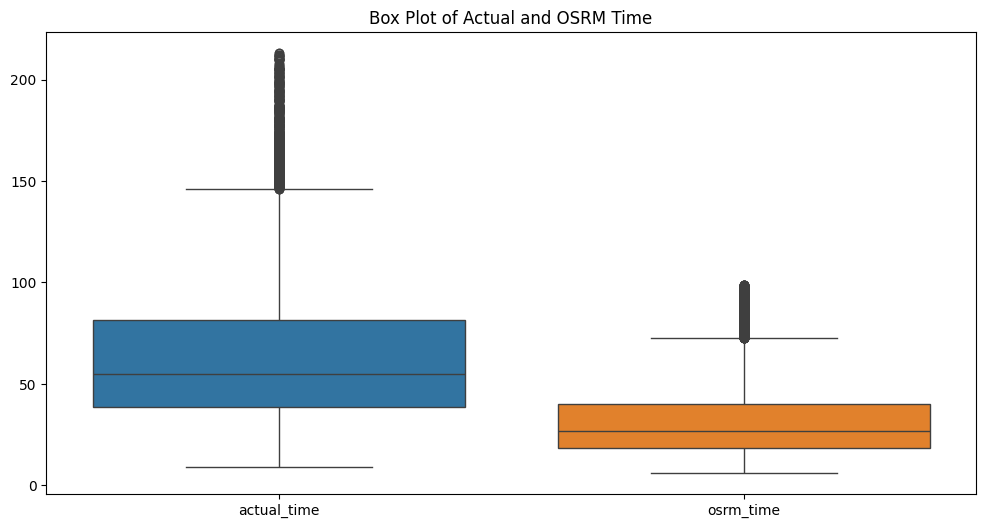

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_df_cleaned[["actual_time", "osrm_time"]])
plt.title("Box Plot of Actual and OSRM Time")
plt.show()


#### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

### Before conducting hypothesis test lets check outliers and treat them.

In [ ]:
aggregated_df = df.groupby("trip_uuid").agg({
    "actual_time": "mean",
    "segment_actual_time": "mean"
}).reset_index()

print(aggregated_df)

                     trip_uuid  actual_time  segment_actual_time
0      trip-153671041653548748   429.193548            32.935484
1      trip-153671042288605164    44.333333            15.666667
2      trip-153671043369099517   436.555556            32.972222
3      trip-153671046011330457    41.000000            29.500000
4      trip-153671052974046625    70.833333            43.500000
...                        ...          ...                  ...
12810  trip-153835182757593609    26.500000            16.000000
12811  trip-153835182991141457    46.750000            28.125000
12812  trip-153835187062195567    44.000000            31.500000
12813  trip-153835190097172173    46.111111            15.444444
12814  trip-153835198515486693    47.625000            24.500000

[12815 rows x 3 columns]


Text(0.5, 1.0, 'Box Plot of segment_actual_time ')

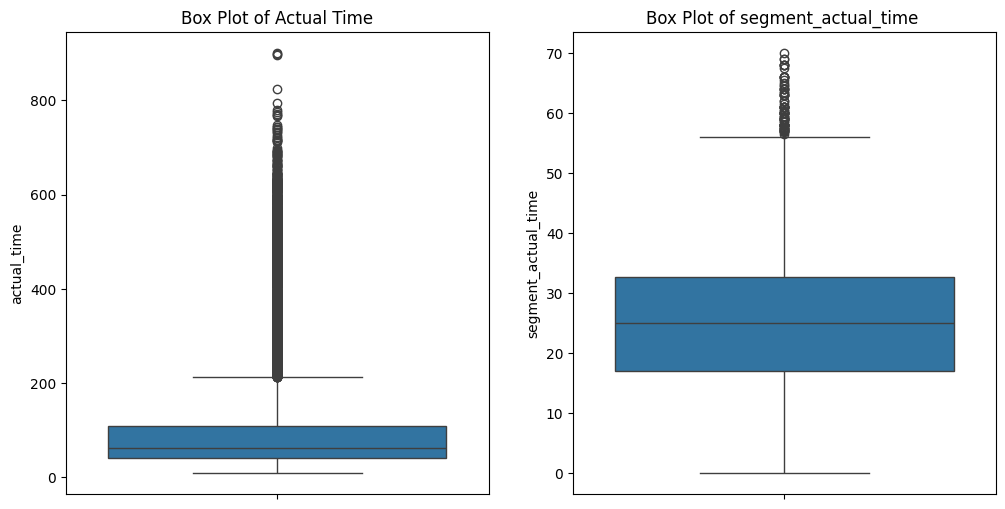

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot for actual_time
plt.subplot(1, 2, 1)
sns.boxplot(y=aggregated_df["actual_time"])
plt.title("Box Plot of Actual Time")

# Box plot for segment_actual_time
plt.subplot(1, 2, 2)
sns.boxplot(y=aggregated_df["segment_actual_time"])
plt.title("Box Plot of segment_actual_time ")

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

actual_time_outliers = identify_outliers(aggregated_df["actual_time"])
segment_actual_time_outliers = identify_outliers(aggregated_df["segment_actual_time"])

print("Actual Time Outliers:")
print(actual_time_outliers)

print("\nsegment actual time Outliers:")
print(segment_actual_time_outliers)

print("\n Count of outliers present in actual and segment actual time time ")
print (len(actual_time_outliers),len(segment_actual_time_outliers))


Actual Time Outliers:
0        429.193548
2        436.555556
13       236.666667
14       219.333333
20       213.125000
            ...    
12678    673.000000
12695    340.958333
12715    373.200000
12730    227.875000
12748    215.476190
Name: actual_time, Length: 1573, dtype: float64

segment actual time Outliers:
101      65.000000
108      58.000000
154      59.333333
233      61.000000
453      58.000000
           ...    
11776    62.000000
11892    57.166667
12032    60.000000
12277    61.000000
12399    59.000000
Name: segment_actual_time, Length: 79, dtype: float64

 Count of outliers present in actual and segment actual time time 
1573 79


In [ ]:
aggregated_df_cleaned = aggregated_df[~aggregated_df["actual_time"].isin(actual_time_outliers)]
aggregated_df_cleaned = aggregated_df_cleaned[~aggregated_df_cleaned["segment_actual_time"].isin(segment_actual_time_outliers)]
aggregated_df_cleaned

,trip_uuid,actual_time,segment_actual_time
1,trip-153671042288605164,44.333333,15.666667
3,trip-153671046011330457,41.000000,29.500000
4,trip-153671052974046625,70.833333,43.500000
5,trip-153671055416136166,30.666667,20.000000
6,trip-153671066201138152,24.000000,24.000000
...,...,...,...
12810,trip-153835182757593609,26.500000,16.000000
12811,trip-153835182991141457,46.750000,28.125000
12812,trip-153835187062195567,44.000000,31.500000
12813,trip-153835190097172173,46.111111,15.444444


perform a paired t-test to compare the two sets of aggregated values since they are related.
Null Hypothesis (H0): There is no significant difference between the actual delivery time and the segment delivery time.

Alternative Hypothesis (H1): There is a significant difference between the actual delivery time and the segment delivery time.

In [ ]:
# Extract values from cleaned DataFrame
actual_time_cleaned = aggregated_df_cleaned["actual_time"]
segment_actual_time_cleaned = aggregated_df_cleaned["segment_actual_time"]

# Perform paired t-test
t_statistic_cleaned, p_value_cleaned = stats.ttest_rel(actual_time_cleaned, segment_actual_time_cleaned)

print(f"T-statistic (cleaned): {t_statistic_cleaned}\nP-value (cleaned): {p_value_cleaned}")

# Conclusion
if p_value_cleaned < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

NameError: name 'stats' is not defined

#### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

### Before conducting hypothesis test lets check outliers and treat them.

In [ ]:
aggregated_df = df.groupby("trip_uuid")[["osrm_distance","segment_osrm_distance"]].mean()
aggregated_df

,osrm_distance,segment_osrm_distance
trip_uuid,,
trip-153671041653548748,287.087232,28.208855
trip-153671042288605164,29.936756,9.354378
trip-153671043369099517,347.255917,26.099536
trip-153671046011330457,15.823750,9.938300
trip-153671052974046625,35.452550,19.623017
...,...,...
trip-153835182757593609,12.738350,7.661550
trip-153835182991141457,36.218200,20.145088
trip-153835187062195567,15.122000,10.044950


Text(0.5, 1.0, 'Box Plot of segment osrm distance')

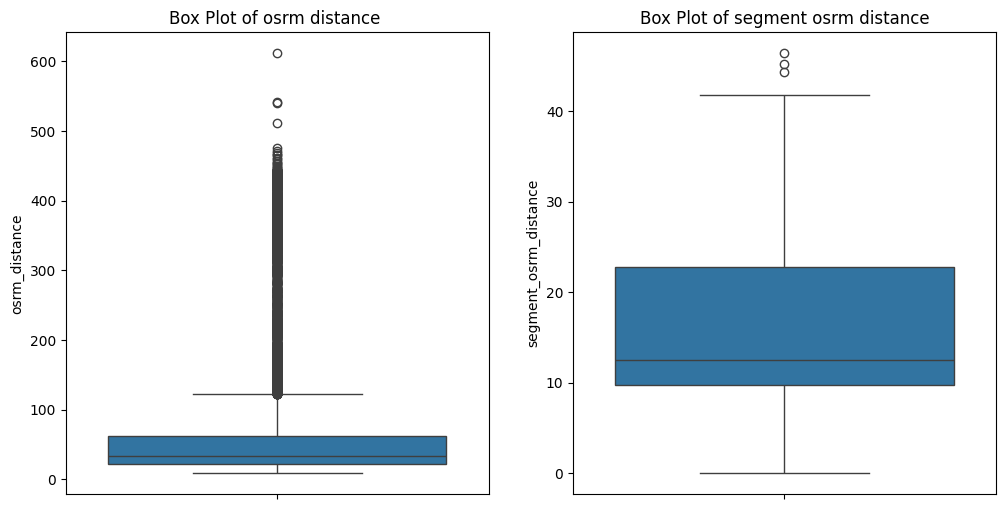

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot for actual_time
plt.subplot(1, 2, 1)
sns.boxplot(y=aggregated_df["osrm_distance"])
plt.title("Box Plot of osrm distance ")

# Box plot for segment_actual_time
plt.subplot(1, 2, 2)
sns.boxplot(y=aggregated_df["segment_osrm_distance"])
plt.title("Box Plot of segment osrm distance")

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

osrm_distance_outliers = identify_outliers(aggregated_df["osrm_distance"])
segment_osrm_distance_outliers = identify_outliers(aggregated_df["segment_osrm_distance"])

print("osrm distance Outliers:")
print(osrm_distance_outliers)

print("\nsegment osrm distance Outliers:")
print(segment_osrm_distance_outliers)

print("\n Count of outliers present in osrm and segment osrm distance")
print (len(osrm_distance_outliers),len(segment_osrm_distance_outliers))


osrm distance Outliers:
trip_uuid
trip-153671041653548748    287.087232
trip-153671043369099517    347.255917
trip-153671121411074590    163.949514
trip-153671320412492075    160.179459
trip-153671321710455800    394.379487
                              ...    
trip-153834401959311819    213.693513
trip-153834549863932905    128.738812
trip-153834572064168752    153.167645
trip-153834664638467397    194.010471
trip-153835150633765601    145.481310
Name: osrm_distance, Length: 1650, dtype: float64

segment osrm distance Outliers:
trip_uuid
trip-153677909453185865    45.1866
trip-153678580087275989    44.3423
trip-153705888695075813    46.4197
Name: segment_osrm_distance, dtype: float64

 Count of outliers present in osrm and segment osrm distance
1650 3


In [ ]:
aggregated_df_cleaned = aggregated_df[~aggregated_df["osrm_distance"].isin(osrm_distance_outliers)]
aggregated_df_cleaned = aggregated_df_cleaned[~aggregated_df_cleaned["segment_osrm_distance"].isin(segment_osrm_distance_outliers)]
aggregated_df_cleaned

,osrm_distance,segment_osrm_distance
trip_uuid,,
trip-153671042288605164,29.936756,9.354378
trip-153671046011330457,15.823750,9.938300
trip-153671052974046625,35.452550,19.623017
trip-153671055416136166,12.731767,9.354900
trip-153671066201138152,12.018400,12.018400
...,...,...
trip-153835182757593609,12.738350,7.661550
trip-153835182991141457,36.218200,20.145088
trip-153835187062195567,15.122000,10.044950


Conduct Hypothesis test
- Null Hypothesis (H0): There is no significant difference between the aggregated OSRM distance and the segment OSRM distance.
- Alternative Hypothesis (H1): There is a significant difference between the two distances.

In [ ]:
from scipy.stats import ttest_rel
# Extract values from cleaned DataFrame
osrm_distance_cleaned = aggregated_df_cleaned["osrm_distance"]
segment_osrm_distance_cleaned = aggregated_df_cleaned["segment_osrm_distance"]

# Perform paired t-test
t_statistic_cleaned, p_value_cleaned = ttest_rel(osrm_distance_cleaned, segment_osrm_distance_cleaned)

print(f"T-statistic (cleaned): {t_statistic_cleaned}\nP-value (cleaned): {p_value_cleaned}")

# Conclusion
if p_value_cleaned < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic (cleaned): 123.72538786273226
P-value (cleaned): 0.0
Reject the null hypothesis: There is a significant difference.


#### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

### Before conducting hypothesis test lets check outliers and treat them.

In [ ]:
df.columns

Index(['data', 'route_schedule_uuid', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'trip_creation_time_formatted', 'od_start_time_formatted',
       'od_end_time_formatted', 'source_city', 'source_state',
       'destination_city', 'destination_state', 'trip_creation_day',
       'trip_creation_month', 'trip_creation_year', 'trip_completion_time',
       'route_type_Carting', 'route_type_FTL'],
      dtype='object')

In [ ]:
aggregated_df = df.groupby("trip_uuid")[["osrm_time","segment_osrm_time"]].mean()
aggregated_df

,osrm_time,segment_osrm_time
trip_uuid,,
trip-153671041653548748,209.580645,20.548387
trip-153671042288605164,23.333333,7.222222
trip-153671043369099517,264.611111,19.777778
trip-153671046011330457,12.000000,8.000000
trip-153671052974046625,27.166667,14.833333
...,...,...
trip-153835182757593609,9.000000,5.500000
trip-153835182991141457,37.500000,20.875000
trip-153835187062195567,11.000000,7.500000


Text(0.5, 1.0, 'Box Plot of segment osrm time')

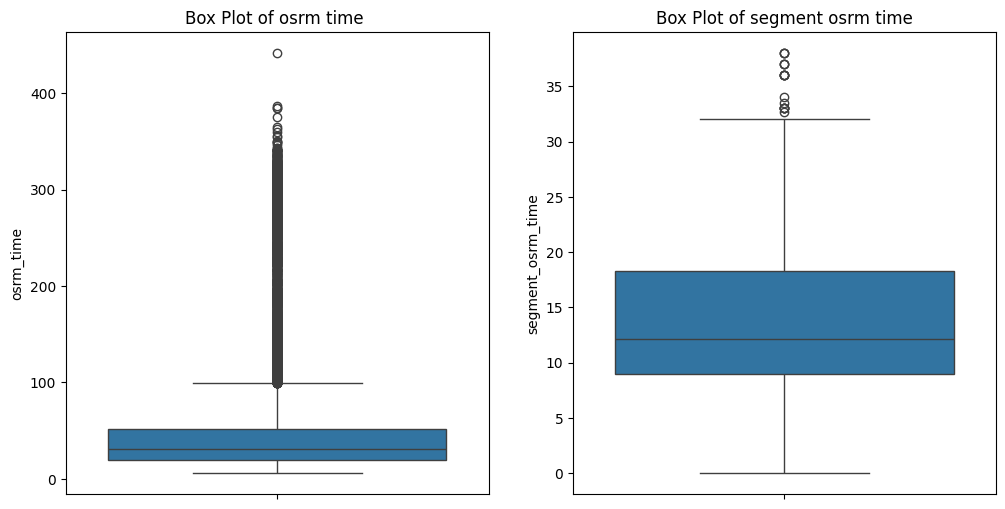

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot for osrm_time
plt.subplot(1, 2, 1)
sns.boxplot(y=aggregated_df["osrm_time"])
plt.title("Box Plot of osrm time ")

# Box plot for segment_osrm_time
plt.subplot(1, 2, 2)
sns.boxplot(y=aggregated_df["segment_osrm_time"])
plt.title("Box Plot of segment osrm time")

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

osrm_time_outliers = identify_outliers(aggregated_df["osrm_time"])
segment_osrm_time_outliers = identify_outliers(aggregated_df["segment_osrm_time"])

print("osrm time Outliers:")
print(osrm_time_outliers)

print("\nsegment osrm time Outliers:")
print(segment_osrm_time_outliers)

print("\n Count of outliers present in osrm and segment osrm time")
print (len(osrm_time_outliers),len(segment_osrm_time_outliers))


osrm time Outliers:
trip_uuid
trip-153671041653548748    209.580645
trip-153671043369099517    264.611111
trip-153671121411074590    129.809524
trip-153671320412492075    122.318182
trip-153671321710455800    287.700000
                              ...    
trip-153834572064168752    109.909091
trip-153834634714657144    102.571429
trip-153834664638467397    148.095238
trip-153834756037200765    128.500000
trip-153835150633765601    105.000000
Name: osrm_time, Length: 1590, dtype: float64

segment osrm time Outliers:
trip_uuid
trip-153675559642519803    33.000000
trip-153677909453185865    36.000000
trip-153680787945325456    32.666667
trip-153684401308055717    37.000000
trip-153687930403989838    36.000000
trip-153694680026384704    33.000000
trip-153704514962852567    33.500000
trip-153705888695075813    36.000000
trip-153707447155456078    37.000000
trip-153714761197530398    33.000000
trip-153718563343502264    37.000000
trip-153745750546231162    33.000000
trip-153760509391543416

In [ ]:
aggregated_df_cleaned = aggregated_df[~aggregated_df["osrm_time"].isin(osrm_time_outliers)]
aggregated_df_cleaned = aggregated_df_cleaned[~aggregated_df_cleaned["segment_osrm_time"].isin(segment_osrm_time_outliers)]
aggregated_df_cleaned

,osrm_time,segment_osrm_time
trip_uuid,,
trip-153671042288605164,23.333333,7.222222
trip-153671046011330457,12.000000,8.000000
trip-153671052974046625,27.166667,14.833333
trip-153671055416136166,10.000000,7.666667
trip-153671066201138152,13.000000,13.000000
...,...,...
trip-153835182757593609,9.000000,5.500000
trip-153835182991141457,37.500000,20.875000
trip-153835187062195567,11.000000,7.500000


Conduct Hypothesis test

- Null Hypothesis (H0): There is no significant difference between the aggregated OSRM time and the segment OSRM time.
- Alternative Hypothesis (H1): There is a significant difference between the two distances.

In [ ]:

# Extract values from cleaned DataFrame
osrm_time_cleaned = aggregated_df_cleaned["osrm_time"]
segment_osrm_time_cleaned = aggregated_df_cleaned["segment_osrm_time"]

# Perform paired t-test
t_statistic_cleaned, p_value_cleaned = ttest_rel(osrm_time_cleaned, segment_osrm_time_cleaned)

print(f"T-statistic (cleaned): {t_statistic_cleaned}\nP-value (cleaned): {p_value_cleaned}")

# Conclusion
if p_value_cleaned < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic (cleaned): 133.07889993936303
P-value (cleaned): 0.0
Reject the null hypothesis: There is a significant difference.


In [ ]:
df.columns

Index(['data', 'route_schedule_uuid', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'trip_creation_time_formatted', 'od_start_time_formatted',
       'od_end_time_formatted', 'source_city', 'source_state',
       'destination_city', 'destination_state', 'trip_creation_day',
       'trip_creation_month', 'trip_creation_year', 'trip_completion_time',
       'route_type_Carting', 'route_type_FTL'],
      dtype='object')

In [ ]:
df["destination_state"].nunique()

31

#### Top 10 states with highest Orders






In [ ]:
df.groupby("destination_state")["trip_uuid"].count().sort_values(ascending = False).head(10)